Linear Regression for base 2
weights after calcualted (w0 + w1*x + w2*(x^2)): [-40.27912612   2.12909707   0.        ]
L2-norm error:  31993.922878891488
result


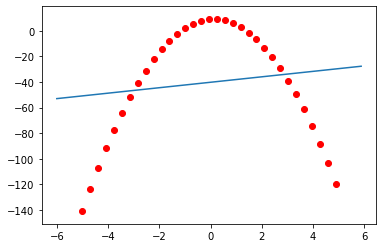

Linear Regression for base 3
weights after calcualted (w0 + w1*x + w2*(x^2)): [[ 8.99949227]
 [ 1.43151538]
 [-5.70665644]]
L2-norm error:  [3.07207088e-26]
result


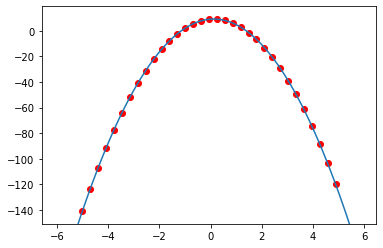

Logistic Regression: 
ground truth: (initial points)


<Figure size 432x288 with 0 Axes>

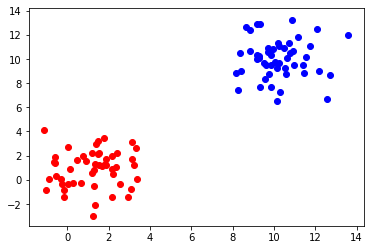

For cross entropy method
Confusion Matrix: 
              predict cluster 0  predict cluster 1
Is cluster 0                 50                  0
Is cluster 1                  0                 50

Recall: 1.0 for cluster 0,     1.0 for cluster 1

Precision: 1.0 for cluster 0,     1.0 for cluster 1

Accuracy: 1.0

weights after calcualted (w0 * x + w1 * y + w2 = 0): [ 0.754026    0.64050246 -7.09107117]
result


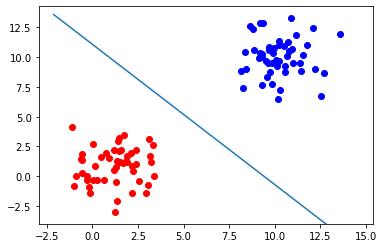

For L2_norm method
Confusion Matrix: 
              predict cluster 0  predict cluster 1
Is cluster 0                 50                  0
Is cluster 1                  0                 50

Recall: 1.0 for cluster 0,     1.0 for cluster 1

Precision: 1.0 for cluster 0,     1.0 for cluster 1

Accuracy: 1.0

weights after calcualted (w0 * x + w1 * y + w2 = 0): [ 0.60895714  0.50754094 -6.00249902]
result


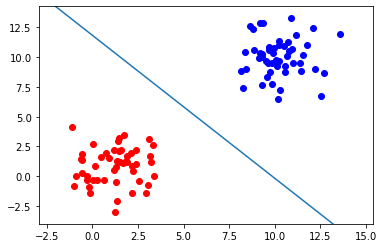

Logistic Regression: 
ground truth: (initial points)


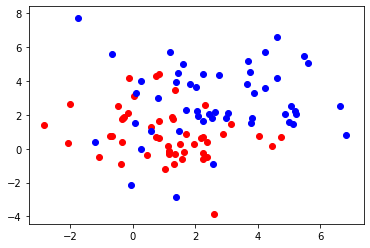

For cross entropy method
Confusion Matrix: 
              predict cluster 0  predict cluster 1
Is cluster 0                 40                 10
Is cluster 1                  9                 41

Recall: 0.8163265306122449 for cluster 0,     0.803921568627451 for cluster 1

Precision: 0.8 for cluster 0,     0.82 for cluster 1

Accuracy: 0.81

weights after calcualted (w0 * x + w1 * y + w2 = 0): [ 0.53652129  0.59702004 -2.05336093]
result


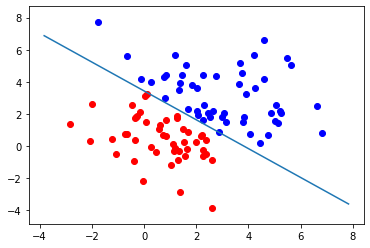

For L2_norm method
Confusion Matrix: 
              predict cluster 0  predict cluster 1
Is cluster 0                 42                  8
Is cluster 1                 15                 35

Recall: 0.7368421052631579 for cluster 0,     0.813953488372093 for cluster 1

Precision: 0.84 for cluster 0,     0.7 for cluster 1

Accuracy: 0.77

weights after calcualted (w0 * x + w1 * y + w2 = 0): [ 1.21053176  1.4428537  -5.69028102]
result


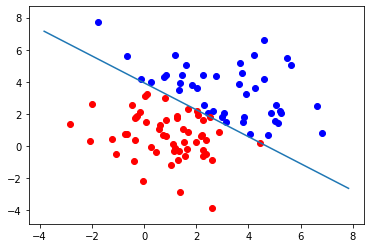

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

def Gauss_Jordan(m) :
    #n*n matrix
    r, c = (m.shape[:2])
    eps = 1.0 / (10**10)
    #ans is the append matrix that will become inverse matrix of m
    ans = np.eye(r)
    #Gauss elimination
    for p in range(r):
        #do pivoting 
        max_r = p
        for rr in range(p+1, r):
            if abs(m[rr][p]) > abs(m[max_r][p]):
                max_r = rr
        #change row
        m[[p, max_r]] = m[[max_r, p]]
        ans[[p, max_r]] = ans[[max_r, p]]
        #check singular
        if abs(m[p][p]) <= eps:
            print("impossible")
            return 
        #Eliminate the elements below pivot
        for rr in range(p+1, r):
            ratio = m[rr][p] / m[p][p]
            for col in range(p, c):
                m[rr][col] -= ratio * m[p][col]
                ans[rr][col] -= ratio * ans[p][col]
    
    #Jorden elimination
    for p in range(r-1, -1, -1):
        pp = m[p][p]
        for row in range(0, p):
            ratio = m[row][p] / pp
            for col in range(c):
                ans[row][col] -= ratio * ans[p][col]
                m[row][col] -= ratio * m[p][col]
        m[p][p] /= pp
        for col in range(c):
            ans[p][col] /= pp
#     print(ans)
    return ans

    

def sigmoid(x):
    try:
        a = 1 / (1 + math.exp(-x))
    except OverflowError:
        a = 0.00000001
    
    if a==1.0:
        return 0.999999999
    return a

def metrics(c):
    print('Confusion Matrix: ')
    d = {"predict cluster 0" : [c[0], c[2]],  "predict cluster 1": [c[1], c[3]]}
    m = pd.DataFrame(data = d, index = ["Is cluster 0", "Is cluster 1"])
    print(m)
    print()
    try:
        r1 = c[0] / (c[0]+c[2])
    except ZeroDivisionError:
        r1 = 0
    try:
        r2 = c[3] / (c[1]+c[3]) 
    except ZeroDivisionError:
        r2 = 0
    print('Recall: {0} for cluster 0,     {1} for cluster 1'.format(r1, r2) )
    print()

    try:
        p1 = c[0] / (c[0]+c[1])
    except ZeroDivisionError:
        p1 = 0
    try:
        p2 = c[3] / (c[2]+c[3])
    except ZeroDivisionError:
        p2 = 0
    print('Precision: {0} for cluster 0,     {1} for cluster 1'.format(p1, p2) )
    print()

    print('Accuracy: {}'.format((c[0]+c[3]) / (c[0]+c[1]+c[2]+c[3])))
    print()

def cross_entropy(w, x, y):
    print('For cross entropy method')

    eps = 1 / 10000
    dim = 3
    total_err = 1000
    cnt = 0
    alpha = 0.0025
    
    while total_err > eps:
        num = len(x[0])
        cnt += 1
        #compute gradient
        w_gradient = [ sum ( [ ( sigmoid( sum( ([ (w[j] * x[j][i]) for j in range(dim)]) ) ) - y[i] ) * x[d][i] \
        for i in range(num)] ) for d in range(dim) ]
        
        #update weight
        for j in range(dim):
            w[j] -= (alpha * w_gradient[j])
        error = sum( [ -( ( y[i] * math.log( sigmoid( sum( [ (w[j] * x[j][i]) for j in range(dim)]) ) ) ) + \
                ( ( 1 - y[i] ) * math.log( 1 - sigmoid( sum( [ (w[j] * x[j][i] ) for j in range(dim)]) ) ) ) ) \
                      for i in range(num) ])
#         if cnt%1000==0:
#             print(error)
        if cnt > 1000:
            break
    plt.figure()
    confuse = [0, 0, 0, 0]
    for i in range(num):
        pred = sigmoid( sum( ([ (w[j] * x[j][i]) for j in range(dim)]) ) )
        if int(pred+0.5) == y[i]:
            if y[i]==1:
                confuse[3]+=1
            else:
                confuse[0]+=1
            
        else:
            if y[i]==1:
                confuse[2] += 1
            else:
                confuse[1] += 1
            
        if int(pred+0.5) == 1:
            plt.scatter(x[0][i], x[1][i], c="blue")
        else:
            plt.scatter(x[0][i], x[1][i], c="red")
    metrics(confuse)
    return w


def L2_norm(w, x, y):
    print('For L2_norm method')
    eps = 1 / 10000
    dim = 3
    total_err = 1000
    cnt = 0
    alpha = 0.00025
    
    while total_err > eps:
        num = len(x[0])
        cnt += 1
        #compute gradient
        w_gradient = [ sum( [ (sigmoid( sum( [ (w[j] * x[j][i]) for j in range(dim) ]) ) - y[i]  )\
                             * sigmoid( sum( [ (w[j] * x[j][i]) for j in range(dim) ]) ) * \
                             (1 - sigmoid( sum( [ (w[j] * x[j][i]) for j in range(dim) ]) ) ) * \
                            x[d][i] for i in range(num) ]  ) for d in range(dim) ]
        #update weight
        for j in range(dim):
            w[j] -= (alpha * w_gradient[j])
        error = (1/2) * sum( [  (y[i] - sigmoid( sum( [ (w[j] * x[j][i]) for j in range(dim) ]) ) )**2 \
                      for i in range(num)] )
#         if cnt%1000==0:
#             print(error)
        if cnt > 1000:
            break
    plt.figure()
    confuse = [0, 0, 0, 0]
    for i in range(num):
        pred = sigmoid( sum( ([ (w[j] * x[j][i]) for j in range(dim)]) ) )
        if int(pred+0.5) == y[i]:
            if y[i]==1:
                confuse[3]+=1
            else:
                confuse[0]+=1         
        else:
            if y[i]==1:
                confuse[2] += 1
            else:
                confuse[1] += 1

        if int(pred+0.5) == 1:
            plt.scatter(x[0][i], x[1][i], c="blue")
        else:
            plt.scatter(x[0][i], x[1][i], c="red")
            
    metrics(confuse)
    return w

def formula(w, x):
    return w[2] * (x**2) + w[1] * x +  w[0]

def multi(A, B):
    Arow, Acol = A.shape
    Brow, Bcol = B.shape
    
    if Acol!=Brow:
        return -1
    C = np.zeros([Arow, Bcol])
    for i in range(Arow):
        for j in range(Bcol):
            for k in range(Acol):
                C[i][j] += A[i][k] * B[k][j]
    return C
def transpose(A):
    Arow, Acol = A.shape
    AT = np.zeros([Acol, Arow])
    for i in range(Acol):
        for j in range(Arow):
            AT[i][j] = A[j][i]
    return AT

def Logistic(data1, data2):
    print("Logistic Regression: ")

    w = np.zeros(3)
    plt.figure()
    plt.scatter((data1['x']), (data1['y']), c='red')
    plt.scatter(data2['x'], data2['y'], c='blue')
    print("ground truth: (initial points)")
    plt.show()
    right =  max( max(data1['x']), max(data2['x'])) +1
    left = min( min(data1['x']), min(data2['x'])) -1
    up = max( max(data1['y']), max(data2['y'])) +1
    down = min( min(data1['y']), min(data2['y'])) -1

    data1['label'] = 0
    data2['label'] = 1
    data1 = data1.append(data2)
    
    t = np.array(( data1['x'], data1['y'], np.ones(data1.shape[0]) ) )
    y = np.array(data1['label'])

    #--------------------------------------------------#
    #give random initial weights
    a = float(random.randint(-10, 10))
    b = float(random.randint(-10, 10))
    c = float(random.randint(-10, 10))
    a = 0.6
    b = 0.5
    c = -6
    w = np.array([a, b, c])
    
    #cross entropy
    w = cross_entropy(w, t, y)
    print("weights after calcualted (w0 * x + w1 * y + w2 = 0):", w)

    a1 = np.linspace(left, right, 100)
    a2 = ( (-w[0] * a1) - w[2]) / w[1]
    plt.ylim(ymin=down, ymax=up)
    print('result')
    plt.plot(a1, a2)
    plt.show()
    #--------------------------------------------------#
    #L2-norm
    w = np.array([a, b, c])
    
    w = L2_norm(w, t, y)
    print("weights after calcualted (w0 * x + w1 * y + w2 = 0):", w)
    a1 = np.linspace(left, right, 100)
    a2 = ( (-w[0] * a1) - w[2]) / w[1]
    print("result")
    plt.ylim(ymin=down, ymax=up)
    plt.plot(a1, a2)
    plt.show()

def Linear(data, base):
    print("Linear Regression for base {}".format(base))
    b = np.array(data.loc[:,'y'])
    b = b.reshape(b.shape[0], 1)
    ones = np.ones(data.shape[0])
    x = data.loc[:,'x']
    right =   max(data['x']) +1
    left = min(data['x']) -1
    up =  max(data['y']) +10
    down =  min(data['y']) -10
    
    if base==2:
        A = np.array( (ones ,x) )
    elif base==3:
        A = np.array( (ones, x, x**2) )
    #transpose and compute weights
    AT = transpose(A)
    #INV = Gauss_Jordan(A.dot(AT))
    #w = INV.dot(A).dot(b)
    INV = Gauss_Jordan(multi(A, AT))
    w = multi( multi(INV, A), b)
    
    if base==2:
        w = np.append(w, 0)
    print("weights after calcualted (w0 + w1*x + w2*(x^2)):", w)
    
    #plot results
    a1 = np.linspace(left, right, 100)
    a2 = formula(w, a1)
    err = 1/2 * sum( [ ( data.loc[i, 'y'] - formula(w, data.loc[i, 'x']) )**2 for i in range(data.shape[0])] )
    print("L2-norm error: ", err)

    plt.figure()
    plt.scatter(data['x'], data['y'], c='red')
    plt.ylim(ymax=up, ymin=down)
    print("result")
    plt.plot(a1, a2)
    plt.show()

if __name__ == '__main__':
    #-------------------Linear Regression--------------#
    data = pd.read_csv("data/linear_data.txt", names = ['x', 'y'])

    #-------------------base2-------------------------#
    Linear(data, 2)
    #-------------------base3-------------------------#
    Linear(data, 3)


    plt.figure()
    #------------------Logistic Regression-------------#
    data1 = pd.read_csv("data/Logistic_data1-1.txt", names=['x', 'y'])
    data2 = pd.read_csv("data/Logistic_data1-2.txt", names=['x', 'y'])
    Logistic(data1, data2)

    data1 = pd.read_csv("data/Logistic_data2-1.txt", names=['x', 'y'])
    data2 = pd.read_csv("data/Logistic_data2-2.txt", names=['x', 'y'])
    Logistic(data1, data2)
    #---------------------end--------------------------#



In [19]:
import numpy as np
def multi(A, B):
    Arow, Acol = A.shape
    Brow, Bcol = B.shape
    
    if Acol!=Brow:
        return -1
    C = np.zeros([Arow, Bcol])
    for i in range(Arow):
        for j in range(Bcol):
            for k in range(Acol):
                C[i][j] += A[i][k] * B[k][j]
    
    return C            
def transpose(A):
    Arow, Acol = A.shape
    AT = np.zeros([Acol, Arow])
    for i in range(Acol):
        for j in range(Arow):
            AT[i][j] = A[j][i]
    return AT

A = np.array([1, 2, 3, 4, 5, 6])
# A = A.reshape(3, 2)
A = A.reshape(3, 2)
print(A.T)
print(transpose(A))
# print(multi(A, B))
# print(A.dot(B))

[[1 3 5]
 [2 4 6]]
[[1. 3. 5.]
 [2. 4. 6.]]


In [28]:
import numpy as np
import math
A = [[1, 2, 3], [2, 4, 5]] 
B = [2, 4]
c = [sum ( [(A[i][j]) for i in range(2)] ) for j in range(3)]
a = int(0.04+0.5)
print(a)
math.exp(-200000)

0


0.0